DSCI 100 Final Project: Exploring Age and Experience as Predictors of Gameplay Duration

Lindsay Der, Hazel Taylor, Ava Webb, Mei Kurihara

Introduction:

A computer science group at UBC is collecting data on how people play video games. The group set up a server running MineCraft, called PLAICraft, and recorded data on the players and playing sessions. The data includes player skill level, demographic information, and past play sessions. The Pacific Laboratory for Artificial Intelligence (PLAI) is a research group at the University of British Columbia (UBC) in the Department of Computer Science. Their work aims to make advancements in generative artificial intelligence (AI). The goal of PLAICraft is to create an embodied AI program. The embodied AI they are trying to create would have the ability to understand speech, respond, and act within a complex virtual environment (Free Minecraft For AI Research, n.d.). Some examples of embodied AI include humanoid robots and drones, and self-driving cars. One of the major differences between embodied AI and other types of AI is that embodied AI can learn from the physical world, rather than learning from what people and data say about the physical world (What Is Embodied AI?, n.d.). The data collected from PLAICraft is being used to train and develop their AI program. 

The question we are trying to answer is can age and experience predict the playing hours of individuals. Age is a numerical variable, experience is a categorical variable, and played hours is a numerical variable. 

Players data:
7 variables. 
196 observations.
The Age column has one NA.
There are 4 outliers in the played_hours column who have values over 100. These outliers may skew the data.

| Variable name | Type of variable | Description |
|---------------|------------------|-------------|
| experience    | Character         | Describes the experience level of each individual. Choices include Pro, Veteran, Amateur, Regular, and Beginner. |
| subscribe     | Logical           | Describes whether or not an individual is subscribed to a service. Choices include TRUE or FALSE. |
| hashedEmail   | Character         | Hashed email address to uniquely identify each individual. |
| played_hours  | Double            | Total number of hours the individual has played. |
| name          | Character         | Gives the names of each individual. |
| gender        | Character         | Gives the gender of each individual. Choices include Male, Female, Non-binary, Prefer not to say, Agender, Two-Spirited, and Other. |
| Age           | Double            | Gives the age of each individual. |


Methods & Results:

First, we will load the players.csv data set and start to wrangle/clean the data. This is done by filtering out any observations with zero tracked played hours and converting each variable to its appropriate type: numerical, factor (categorical), or logical. Next, we will drop all columns not relevant to our analysis and only keep age, experience, and played hours. We are left with our variables of interest and to explore the data, we will look at mean age and played hours. 

In [ ]:
#Loading the data 
library(tidyverse)
library(tidymodels)
library(caret)
url <- "https://raw.githubusercontent.com/lindsayder33/individual_planning_stage/refs/heads/main/players.csv"
players_data <- read_csv(url)
players_data

In [ ]:
#Wrangling and cleaning the data 
library(dplyr)
players_tidy <- players_data |> 
  mutate(played_hours = as.numeric(played_hours)) |>
  filter(played_hours != 0.0)

players_tidy <- players_tidy |>
  mutate(
    played_hours = as.numeric(played_hours),  
    Age = as.numeric(Age),                 
    gender = as.factor(gender),              
    experience = as.factor(experience),       
    subscribe = as.logical(subscribe)        
  ) |>
  drop_na() 
players_tidy

In [ ]:
#Summary of data set for analysis 
summary <- players_tidy |> 
select(played_hours, Age, experience)
summary
#Mean values of selected numerical variables 
mean_values <- players_tidy |>
  summarise(mean_played_hours=mean(played_hours), mean_age=mean(Age))
mean_values

To explore trends within the data, we will make exploratory visualizations comparing age and experience with played hours. 

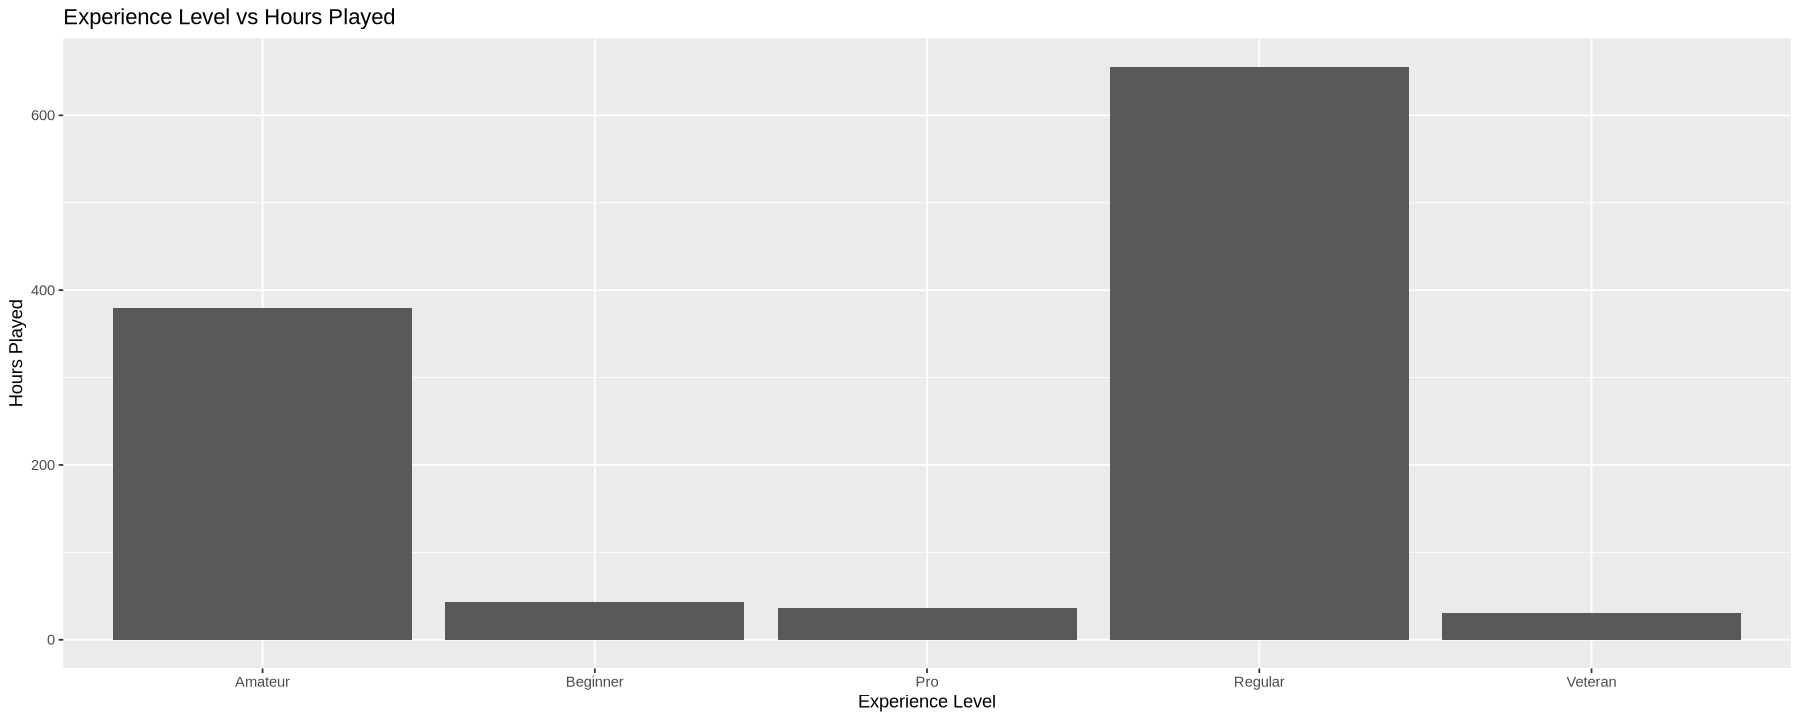

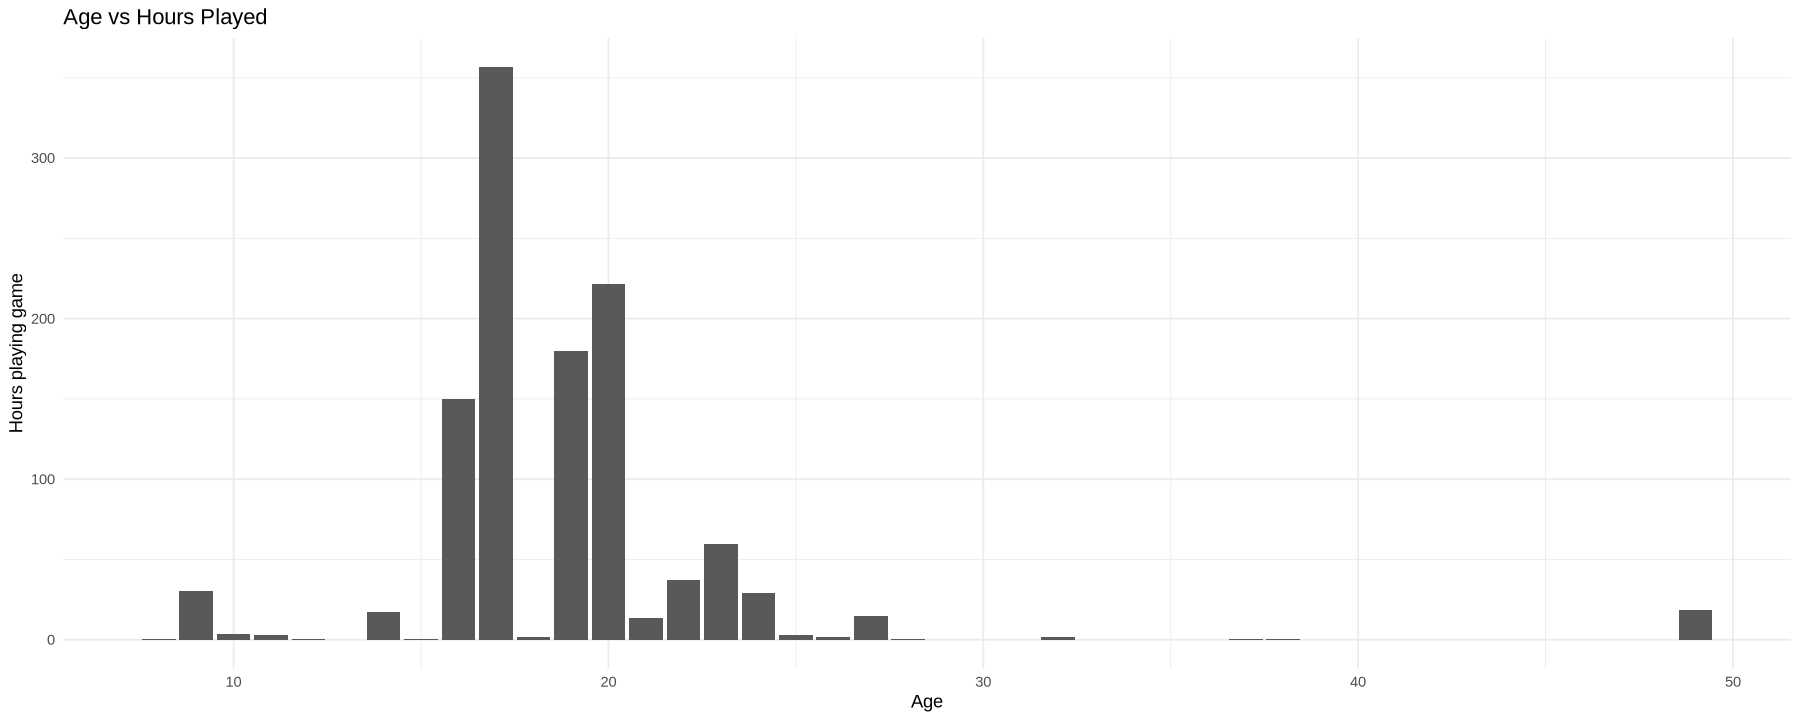

In [40]:
#Visualizations for exploratory data analysis 
library(ggplot2) 
hours_experience_plot <- ggplot(players_tidy, aes(x=experience, y=played_hours)) + 
                                geom_bar(stat="identity")+
                                xlab("Experience Level") +
                                ylab("Hours Played")+
                             ggtitle("Experience Level vs Hours Played")
hours_experience_plot 

hours_age_plot <- ggplot(players_tidy, aes(x = Age, y=played_hours)) +
  geom_bar(stat="identity")+
 xlab("Age")+
ylab("Hours playing game") + 
ggtitle("Age vs Hours Played") +
  theme_minimal()
hours_age_plot

Now, we will carry out our data analysis by first grouping the data by expereince and age, and calculating mean played hours. Following this, we will make a visualization to explore the relationship between experience and played hours by age. We will do this using facet(wrap) so that plots are separated based on experience level and we can best look at trends. Before conducting kNN regression, we will remove outliers (played_hours above 100 hours) in order to not skew the data. We will also convert experience into an integer variable. 

experience,Age,mean_played_hours
<fct>,<dbl>,<dbl>
Amateur,11,2.9000000
Amateur,14,17.2000000
Amateur,16,150.0000000
Amateur,17,8.9666667
Amateur,18,0.9000000
Amateur,19,0.1000000
Amateur,21,1.3500000
Amateur,22,11.0000000
Amateur,23,11.6400000


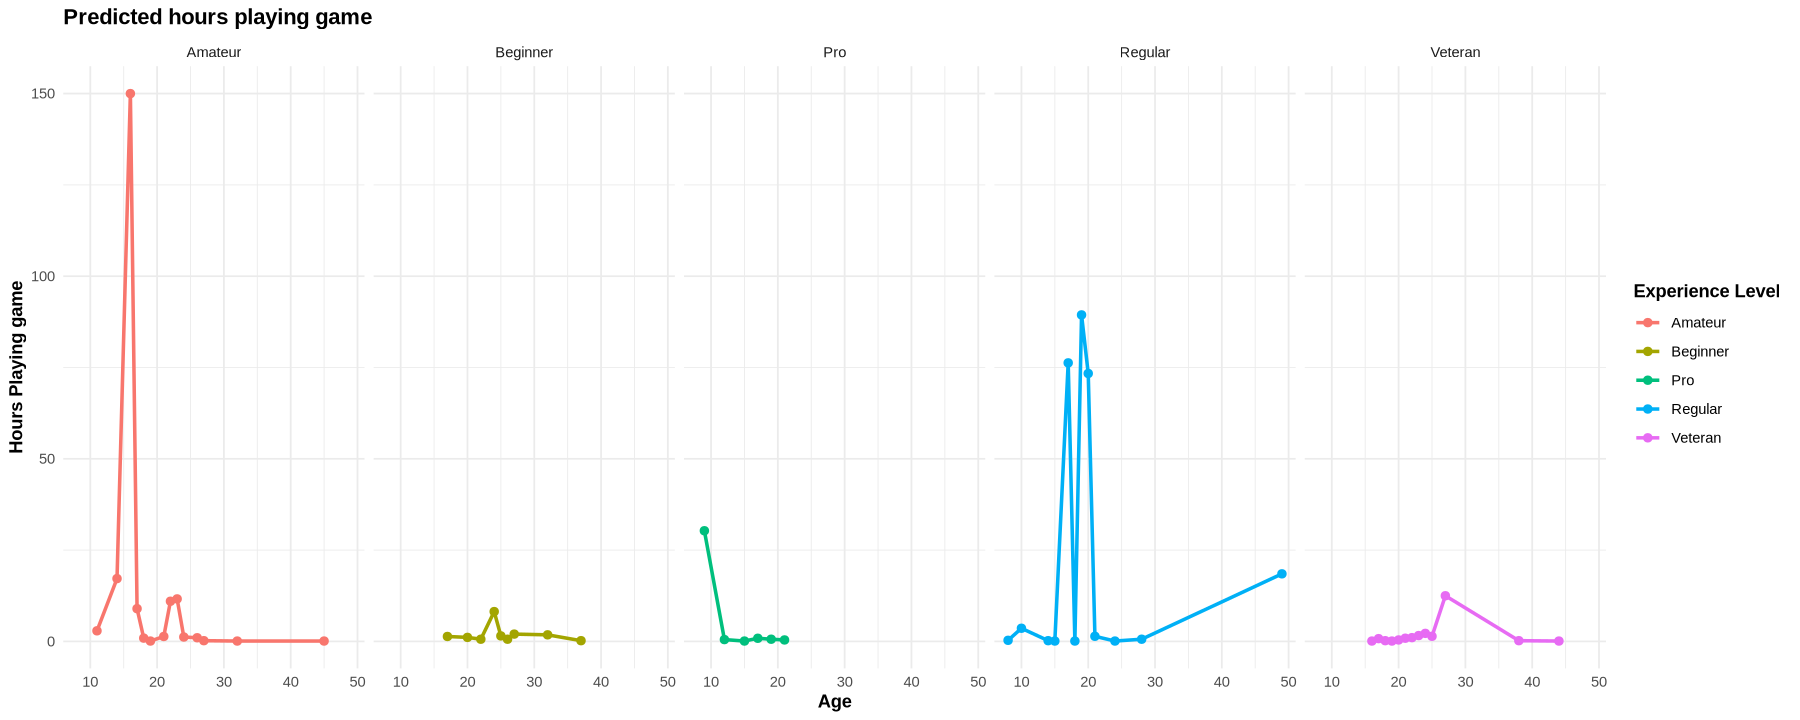

In [41]:
#data analysis-group the data by experience and age & calculate the mean of played hours
group_summary <- players_tidy |>
  group_by(experience, Age) |>
  summarise(mean_played_hours = mean(played_hours), .groups = 'drop')
group_summary

# explore the trend of average hours played based on age and experience level
 options(repr.plot.width = 15, repr.plot.height = 6)
summary_plot <- ggplot(group_summary, aes(x = Age, y = mean_played_hours, color = experience)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  facet_grid(~experience) + 
  labs(title = "Predicted hours playing game",
       x = "Age",
       y = "Hours Playing game",
       color = "Experience Level") +
  theme_minimal()+
　　　 theme(
    plot.title = element_text(face = "bold"),      
    axis.title.x = element_text(face = "bold"),  
    axis.title.y = element_text(face = "bold"),   
    legend.title = element_text(face = "bold")      
  )
summary_plot


model_data <- players_tidy |>
  select(played_hours, Age, experience) |>
filter(played_hours <= 100)

# factor → integer
model_data_experience <- as.integer(model_data$experience)

To understand how age and experience levels relate to the number of hours played, we will use K-Nearest Neighbors (KNN) regression. We will first convert the categorical “experience” variable into a numeric format, and then split the data into the training set (70%) and testing set (30%), using a random seed to ensure reproducibility. 

Next, we will standardize the numerical predictors using “step_center” and “step_scale” to ensure all features contribute equally to the distance calculations. We will use 5-fold cross-validation on the training set to tune our KNN model and find the optimal number of neighbors (k). A range of k values will be evaluated and plotted against the Root Mean Square Error (RMSE) to visualize which k will give the best predictive performance. The best k value will be selected by the "elbow point", where increasing K will only marginally improve the model while adding unnecessary complexity. Finally, we will train our final model using the training set and evaluate its performance on the test set. We will also set the strata argument to the categorical variable (experience) to make sure that the training and testing subsets contain the correct proportions of each category of observation. 

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,18.26671,5,4.462581,Preprocessor1_Model01
4,rmse,standard,11.60361,5,1.780611,Preprocessor1_Model02
7,rmse,standard,11.07586,5,1.858117,Preprocessor1_Model03
10,rmse,standard,10.93200,5,1.955607,Preprocessor1_Model04
13,rmse,standard,10.56822,5,2.197059,Preprocessor1_Model05
16,rmse,standard,10.72534,5,2.099292,Preprocessor1_Model06
19,rmse,standard,10.56764,5,2.109285,Preprocessor1_Model07
22,rmse,standard,10.47804,5,2.178411,Preprocessor1_Model08
25,rmse,standard,10.35522,5,2.252023,Preprocessor1_Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
49,rmse,standard,10.11055,5,2.134693,Preprocessor1_Model17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8.620863


.pred,played_hours,Age,experience
<dbl>,<dbl>,<dbl>,<fct>
1.2945312,30.3,9,Pro
4.7132812,3.8,17,Veteran
0.7851563,0.7,21,Amateur
4.7132812,0.5,17,Amateur
0.6312500,0.6,19,Regular
20.7914063,0.1,23,Amateur


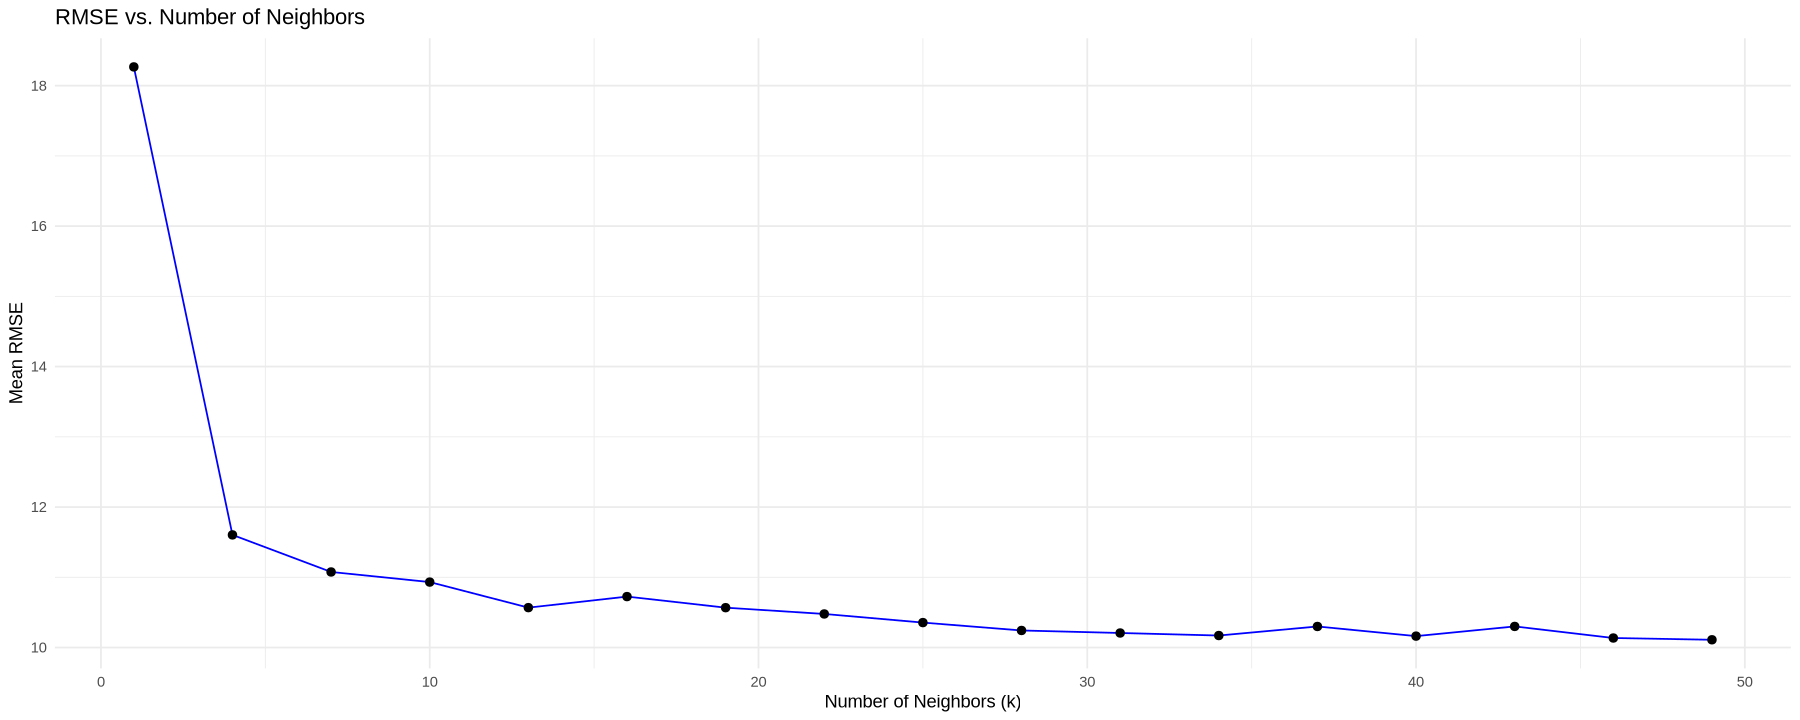

In [31]:
#knn regression
set.seed(123)
split <- initial_split(model_data, prop = 0.70)
train_data <- training(split)
test_data <- testing(split)

knn_recipe <- recipe(played_hours~Age, experience, data=train_data) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

knn_vfold <- vfold_cv(train_data, v = 5, strata = experience)

knn_wkflw <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

knn_wkflw

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))

knn_results <- knn_wkflw |>
  tune_grid(resamples = knn_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

elbow <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
  geom_line(color = "blue") +
  geom_point(size = 2) +
  labs(title = "RMSE vs. Number of Neighbors",
       x = "Number of Neighbors (k)",
       y = "Mean RMSE") +
  theme_minimal()
elbow

knn_results

knn_min <- knn_results |>
  filter(mean == min(mean))
knn_min

knn_spec <- nearest_neighbor(mode = "regression", neighbors = 4) |>
  set_engine("kknn")

knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
fit(data=train_data)

predictions <- knn_fit |>
  predict(test_data) |>
  bind_cols(test_data) 

rmse_result <- predictions |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == "rmse")
rmse_result

# see the results 
head(predictions)

To visualize how well our K-Nearest Neighbors (KNN) regression model performed in predicting hours played, we will create a scatter plot. Each point on the plot represents an individual observation, with the x-axis showing players'age and the y-axis showing the actual predicted hours. The line shows

The points are colored by player experience level (e.g., Beginner, Pro, Veteran) to explore how experience may relate to prediction patterns. Overlaid on the scatter plot is a line representing the model’s predicted values, plotted against age.

This prediction line illustrates the general trend captured by the model and allows us to visually assess how closely the model's predictions align with the actual data. A strong alignment between the line and the scatter points indicates better model performance.

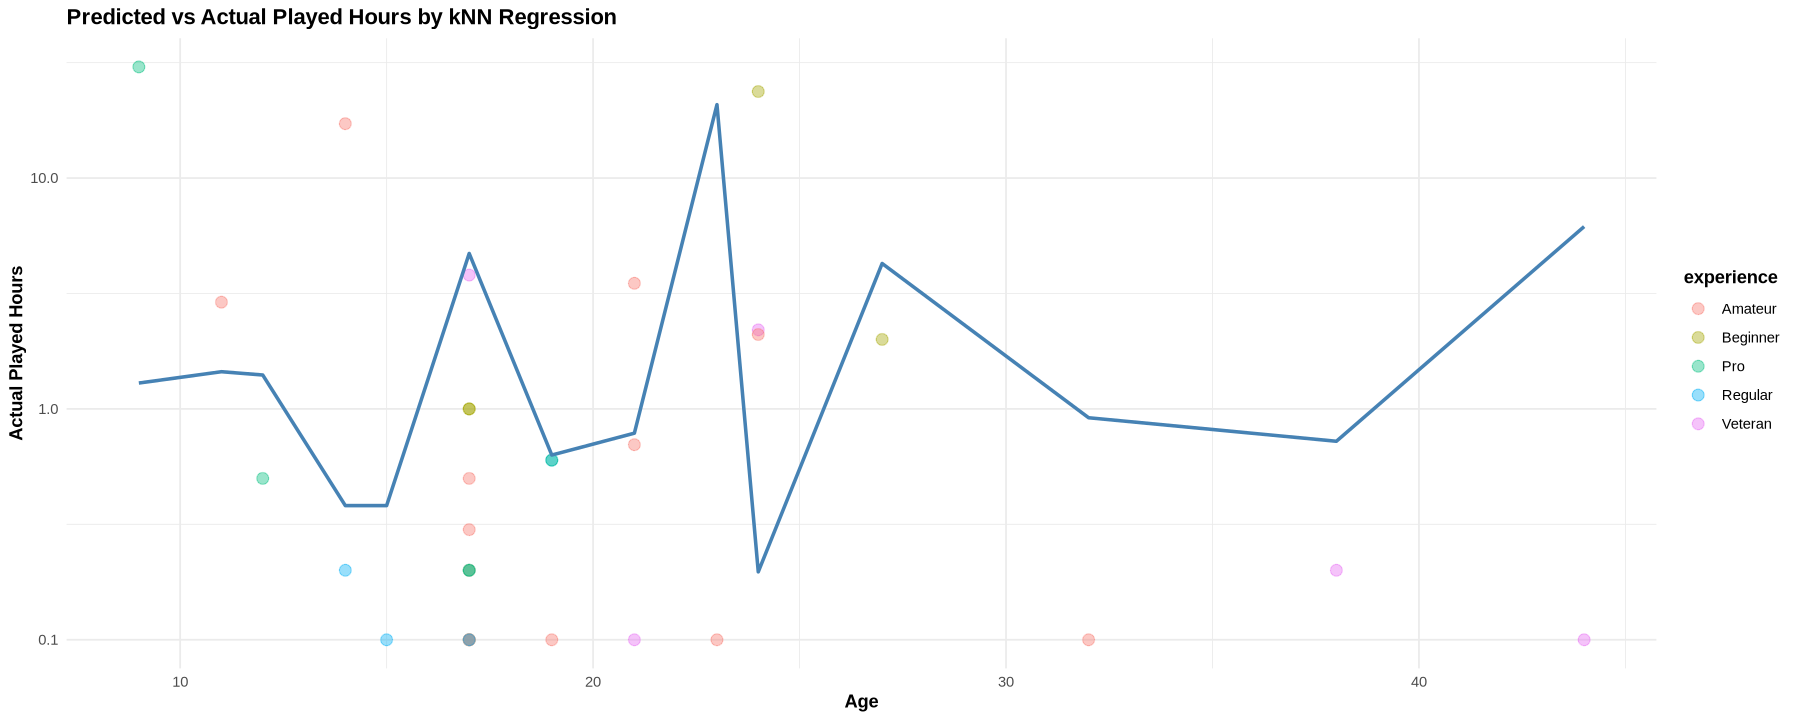

In [37]:
#how well our kNN regression model predicted the hours compared to actual values
playing_hours_regression <- ggplot(predictions, aes(x =Age , y = played_hours, color=experience)) +
  geom_point(alpha=0.4, size=3) +
  geom_line(data = predictions,
            mapping = aes(y = .pred),
            color = "steelblue",
            linewidth = 1) +

  labs(
    x = "Age",
    y = "Actual Played Hours",
    title = "Predicted vs Actual Played Hours by kNN Regression"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.title = element_text(face = "bold")
  ) + 
scale_y_log10()
playing_hours_regression

Discussion:

We found no clear correlation between Age and Experience Level and hours played, indicating that these variables combined cannot be used to reliably predict hours played.  We did find that there were some categories such as Amateur players between the ages of 10 and 15, Regular players between the ages of 15 and 20 along with those between 30 and 50 had generally more hours played than other age and experience level combinations. This result was observed in our first visualization, titled “Predicted hours playing time”. While these results were interesting and may provide an indication that players between certain ages accumulate more hours played, they do not show that age combined with experience will reliably predict hours played. When we graph these variables a second time, this time using a KNN regression model, we find that there is no clear correlation.
	
This is not what we expected to find.  Because age alone is able to predict the number of hours played (​​Entertainment Software Association, 2024),  we expected to find that the variables Age and Experience Level could be used to predict the number of hours a given player had spent playing. 
	
These findings could help to inform marketing and advertising decisions made by video game companies. Understanding that combining age and experience is not an effective way to predict hours played is helpful for the people making these decisions, especially because this result is somewhat counter-intuitive.  
	
As this project found that  age and experience level could not be used to predict the number of hours a given player had spent playing, future research might seek to determine what variables or combination of variables could be used to predict hours played. Some possible predictors that come from this data set are gender, age alone, experience level alone, or gender and age/experience level combined. If we were to use data from other sources, we could use something like  income, hours worked per day, or education level to see whether these variables are better predictors of hours played. 
	
A potential source of error for this analysis is that the data set we are working with is very large and KNN regression does not work on models that are extremely large.  This could lead to inaccurate analysis of the relationship between there variables. 
	
In summary, we found no strong correlation between Age/Experience Level and Hours played – indicating that these are not good predictive variables for the question at hand. 



References:

Entertainment Software Association. (2024). 2024 Essential Facts About the U.S. Video Game Industry. The ESA. https://www.theesa.com/resources/essential-facts-about-the-us-video-game-industry/2024-data/

Free Minecraft For AI Research. (n.d.). Retrieved April 4, 2025, from https://plaicraft.ai/

What Is Embodied AI? How It Powers Autonomous Systems | TechTarget. (n.d.). Search Enterprise AI. Retrieved April 4, 2025, from https://www.techtarget.com/searchenterpriseai/definition/embodied-AI